In [5]:
%matplotlib inline
#
from lrgsglib.core import *
#
move_to_rootf()
plt.style.use('ipynb/nb_plotsheet.mplstyle')

Current working directory: /home/opisthofulax/Documents/PhD/projects/complex-networks/lrgsglib


In [14]:
pflip = 0.05
T = 0.5
iclist = ["uniform", "all_1", "gs_0", "gs_1", "gs_99"]

In [15]:
l = Lattice2D(64, pflip=pflip)
l.flip_random_fract_edges()
l.compute_k_eigvV(100)

In [16]:
slist = {}
for icc in iclist:
    isdy = IsingDynamics(l, T=T, runlang='C3', ic=icc, NoClust=0, thrmSTEP=1)
    isdy.init_ising_dynamics()
    #
    isdy.run()
    ene_tmp = np.fromfile(l.path_ising / f"ene_p={pflip:.3g}_T={T:.3g}_.bin")/2
    slist[icc] = [ene_tmp, isdy.s.reshape(-1, *l.syshape)]
#
# sout = np.fromfile(l.path_ising / f"sout_p={pflip:.3g}_T={T:.3g}_.bin", dtype=np.int8).reshape(-1, *l.syshape)
# ene = np.fromfile(l.path_ising / f"ene_p={pflip:.3g}_T={T:.3g}_.bin")/2

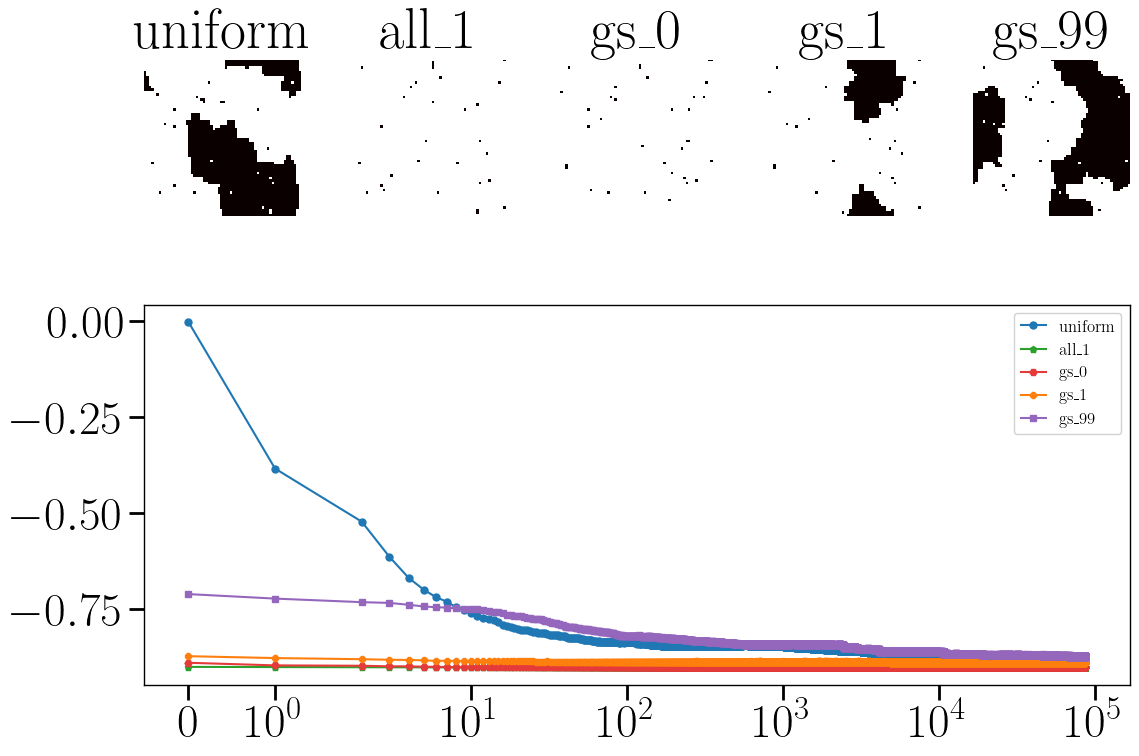

In [17]:
fig = plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(2, len(iclist), height_ratios=[1, 1])

# First row: one axis per image
img_axes = [fig.add_subplot(gs[0, i]) for i in range(len(iclist))]

# Second row: one axis spanning all columns
plot_ax = fig.add_subplot(gs[1, :])

for i, (icc, (ene, sout)) in enumerate(slist.items()):
    img_axes[i].imshow(sout.squeeze(), cmap='hot', interpolation='nearest')
    img_axes[i].axis('off')
    img_axes[i].set_title(icc)

    plot_ax.plot(ene, label=icc)

plot_ax.set_xscale('symlog')
plot_ax.legend()
fig.tight_layout()


In [76]:
ovlps = [spin_overlap(eigv_list[i], eigv_list[j], max_overlap=False) for i in range(len(eigv_list)) for j in range(i+1, len(eigv_list))]

NameError: name 'eigv_list' is not defined

(array([0.02006564, 0.        , 0.        , 0.02006564, 0.        ,
        0.02006564, 0.02006564, 0.        , 0.        , 0.02006564,
        0.        , 0.        , 0.02006564, 0.02006564, 0.        ,
        0.        , 0.04013127, 0.02006564, 0.        , 0.04013127,
        0.02006564, 0.08026255, 0.04013127, 0.06019691, 0.02006564,
        0.14045946, 0.04013127, 0.24078764, 0.20065637, 0.220722  ,
        0.30098455, 0.38124709, 0.34111582, 0.46150964, 0.46150964,
        0.8226911 , 0.76249419, 0.92301928, 1.30426638, 1.66544784,
        1.96643238, 3.09010803, 3.02991112, 4.3341775 , 4.67529332,
        5.47791879, 7.20356353, 6.32067552, 6.52133189, 7.2436948 ,
        6.90257898, 5.63844388, 4.47463696, 3.63188022, 3.31083004,
        3.02991112, 2.06676057, 1.78584166, 1.28420074, 1.14374128,
        0.72236292, 0.74242855, 0.72236292, 0.441444  , 0.40131273,
        0.441444  , 0.26085328, 0.18059073, 0.26085328, 0.14045946,
        0.18059073, 0.220722  , 0.06019691, 0.06

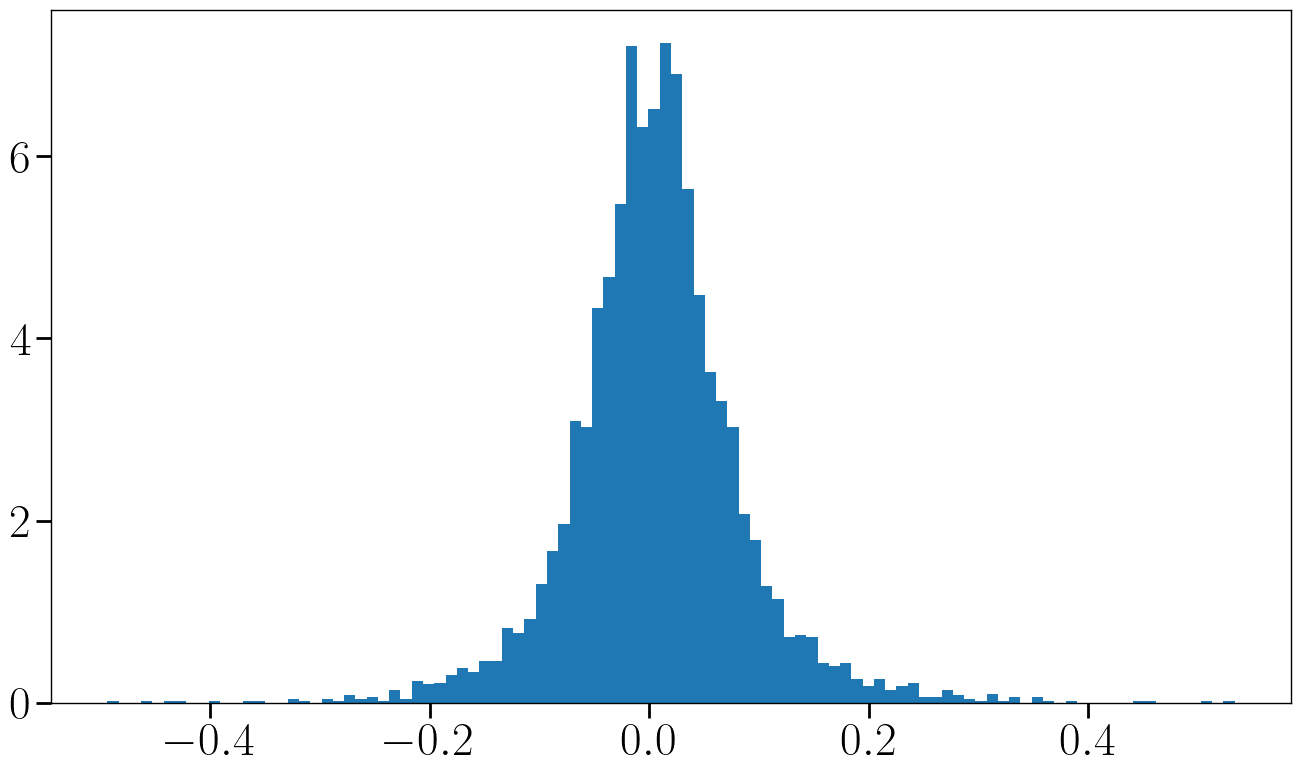

In [8]:
plt.hist(ovlps, bins=100, density=True)

In [ ]:
plt.imshow(eigv_list[0].reshape(*l.syshape))